In [4]:
#Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

#First function calculates the heat capacity for a given temperature, using the Debye specific heat formula.
def heatCapacity(temp):

    #Set the volume V of Al, the density, Debye temperature and Boltzmann's constant.
    V = 0.001
    density = 6.022*10**28
    theta = 428.0
    kB = 1.38*10**-23
    
    
    #Define a lambda function: this is the integrand of the integral within the specific heat formula.
    f = lambda x: x**4*np.exp(x)/(np.exp(x)-1)**2
    
    #Define a variable to hold the two quantities generated by scipy's quad integrate function.
    #Quad generates the value as well as its error, so "area" is an array with two values.
    area = integrate.quad(f, 0, theta/temp)
    
    #For a given temperature, calculate and store the value for the specific heat in variable "Cv".
    #I only want the integral value stored in "area," not its error. Thus, only the first index is needed.
    Cv = 9.0*V*density*kB*(temp/theta)**3.0*area[0]
    
    #Print the heat capacity.
    print("The heat capacity at temperature ", temp, "K is: ", Cv)

#Define another function to calculate a range of heat capacities for different temperatures, and plot the curve.
def heatCapCurve(tempRange):
    
    #Same variable declarations as in previous function.
    V = 0.001
    density = 6.022*10**28
    theta = 428.0
    kB = 1.38*10**-23
    
    #Same lambda function as in previous function.
    f = lambda x: x**4*np.exp(x)/(np.exp(x)-1)**2
    
    #This time, create an uninitialized array to hold different heat capacity values
    #for different temperatures.
    Cv = []
    
    #Using the same logic as in my "heatCapacity" function, populate the Cv array with
    #this for loop over a specified temperature range.
    for i in range(5, tempRange+1):
        area = integrate.quad(f, 0, theta/i)
        
        Cv.append(9.0*V*density*kB*(i/theta)**3.0*area[0])
    
    
    #The followin
    x = np.linspace(5, tempRange+1, tempRange-4)
    y = Cv
    plt.plot(x, y, 'b')
    
    plt.xlim([5,tempRange+1])
    plt.xlabel("Temperature (K)")
    plt.ylabel("Cv (J/K)")
    plt.title("Heat Capacity As a Function of Temperature")
    
    plt.show()

In [5]:
heatCapacity(125)

The heat capacity at temperature  125 K is:  1478.3063950419282


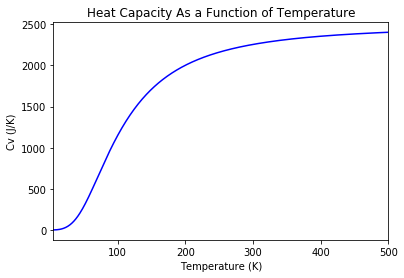

In [6]:
heatCapCurve(500)